<a href="https://colab.research.google.com/github/Manziredem/Image-Manupulation-/blob/main/Image_classification_with_Tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image *classification* with Tensorflow by using built in data "NMIST Dataset"**

*   List item
*   List item



"Tensorflow is a Google opensource ,machine learning framework for dataflow programming.tensorflow provise the image processess much easier". Example of the known companies that use Tensorflow include NASA, Airbnb, etc 

Image classification refers to categorizing the digital image pixels to one or more classes. It can also refer to extraction information from multiple images

In [1]:
# Keras
#"Keras is a high-level neural network library the runs on top of Tensorflow."--Google
# This is a built in APIs that are used to build and train machine learning models
# Keras is mostly used because it is modular, user friendly and extendable

In [2]:
# data that us going to be used has 70000 images in different categories.
# we shall use 60000 images for trainig and 10000 for testing 

In [3]:
# import important 

import tensorflow as tf
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
print(tf.__version__)

2.8.2


In [6]:
# load the dataset

# We are using Kelas build in dataset for mnist fashion
mnist_data = keras.datasets.fashion_mnist 

# the above data will give numpy arrays where train images and train labels arrays will be ised to train the model and that is what the model uses to run
# Later on, we will test the model again the test images and test labels arrays

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

# The image are 28 by 28 numpy arrays with the pixels values ranging from 0 to 255
# The labels are the arrays of integers ranging from 0 to 9 that corresponds to the class of clothing it represents. 
# each image is mapped to a single label 

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
# The following are class of categories of the labels - cat_name = category name 

cat_names = ['T-hsirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sabdal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# Data exploration before the actual model traing 

train_images.shape # this shows 60000 images and each has 28 by 28 pixels

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels # output the interger from 0 - 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

In [14]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

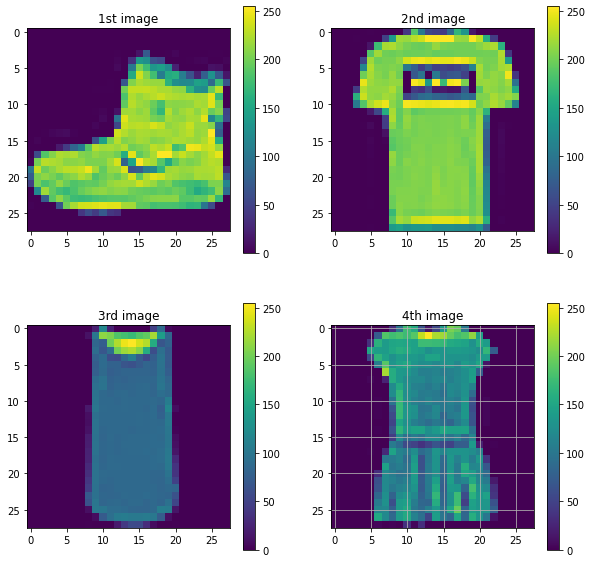

In [15]:
# It is import to preprocess the data before stating the actual processing 

# inspect the some images
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.imshow(train_images[0])
plt.colorbar()
plt.title("1st image")
plt.grid(False)

plt.subplot(2,2,2)
plt.imshow(train_images[1])
plt.colorbar()
plt.title("2nd image")
plt.grid(False)

plt.subplot(2,2,3)
plt.imshow(train_images[2])
plt.colorbar()
plt.title("3rd image")
plt.grid(False)

plt.subplot(2,2,4)
plt.imshow(train_images[3])
plt.colorbar()
plt.title("4th image")
plt.grid(True)

plt.show()

# From the colorbar, we can see that the image pexels range from 0 to 255

In [16]:
# the values of the image pixels have scale from 0 to 1 for feeding the neural network model
# to make this hape, we devide the value by 255 for both training and test data

# It is very important that the traing and testing data are processed in the same way

train_images = train_images / 255.0
test_images = test_images / 255.0

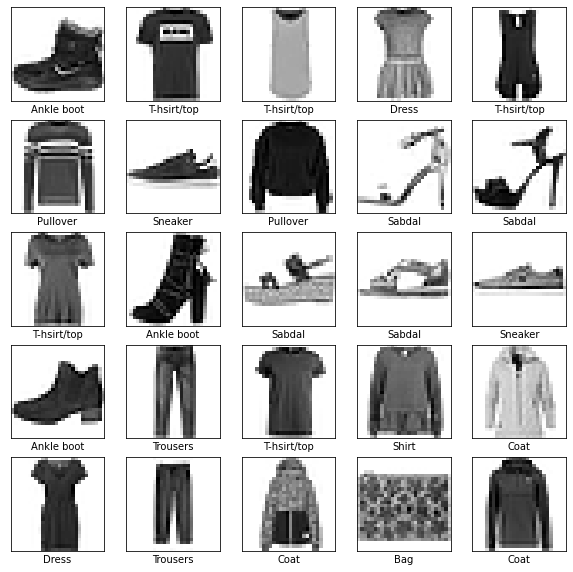

In [17]:
from tensorflow.python import platform
# Now we are display 1st 25 images from the traing data, with the corresponding labels

plt.figure(figsize = (10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(cat_names[train_labels[i]])
plt.show()


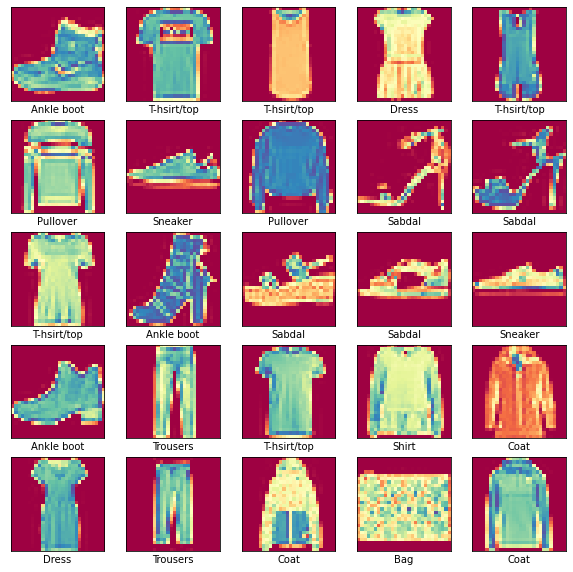

In [18]:
plt.figure(figsize = (10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.Spectral)
  plt.xlabel(cat_names[train_labels[i]])
plt.show()

In [19]:
# building the model
# We need to configure the laters of the model and compliling the model 

# Layers set up: These are the basic building block of the model. 
# We are using the 'Flatten' and 'Dense'
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #transform the format of the image from 2D array to a 1D array of 28......WHY?- this is like unstacking the image pixels and line them up 
    keras.layers.Dense(128, activation = tf.nn.relu), # this and the below are the layers by which 128 and 10 are nodes or neurons
    keras.layers.Dense(10, activation=tf.nn.softmax) # this returns an 10 array probability T score 
])

In [20]:

# Compile the model  
# e.g: we have a loss fn which measure the model accuracy during the training and this need to be maximized

model.compile(
    optimizer = 'adam', # how the model is updated based on the data it recives
    loss = 'sparse_categorical_crossentropy', # loss fn
    metrics = ['accuracy'] # monitor of traing and testing steps. the accuracy which is the fraction of image that are correctly classified 
)

In [21]:
# train the model 

model.fit(train_images, train_labels, epochs = 5) # call the model, and fit the training data. epochs number is an important hyperparameter for the algorithm, It specifies the number of epochs or complete passes of the entire training dataset passing through the training process


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5018 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3798 - accuracy: 0.8635
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3370 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3134 - accuracy: 0.8835
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2963 - accuracy: 0.8906


In [22]:
# we can repeat the same process as the above by using the number of epochs = 10, to see if there is the changes
# We can see that accuracy has changed from 0.8915 to 0.9243

model.fit(train_images, train_labels, epochs = 10) 

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2813 - accuracy: 0.8942
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2685 - accuracy: 0.9001
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2563 - accuracy: 0.9045
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2465 - accuracy: 0.9079
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2402 - accuracy: 0.9107
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2295 - accuracy: 0.9137
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2233 - accuracy: 0.9161
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2149 - accuracy: 0.9186
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2112 - accuracy: 0.9216
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.203

In [23]:
# display the accuracy for testing
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

# We can see that the training accuracy is bigger than the testing acc which represent an example of "overfiting"
# Overfitting is when a machine learning model perform worse on a new data than the training data

313/313 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8885
Test accuracy: 0.8884999752044678


In [24]:
predictions = model.predict(test_images)

In [25]:
# A prediction is a array of 10 numbers that describe the confidence of the model that an image correspond to the each of the different articles.     

predictions[0]

array([5.3921440e-07, 1.8265861e-10, 1.1742181e-09, 1.1716698e-09,
       3.6212291e-09, 5.0593917e-05, 1.6504366e-08, 3.4801988e-03,
       3.5228673e-09, 9.9646866e-01], dtype=float32)

In [26]:
# for instance, the below shows that the model os confent at 9 that the image is an ankle but
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img): 
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i] 
  plt.grid(False) 
  plt.xticks([]) 
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array) 
  if predicted_label == true_label: 
    color = 'blue' 
  else: color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(cat_names[predicted_label], 
                                100*np.max(predictions_array), 
                                cat_names[true_label]), 
                                color=color)

def plot_value_array(i, predictions_array, true_label): 
  predictions_array, true_label = predictions_array[i], true_label[i] 
  plt.grid(False) 
  plt.xticks([]) 
  plt.yticks([]) 
  thisplot = plt.bar(range(10), predictions_array, color = "#777777") 
  plt.ylim([0,1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red') 
  thisplot[true_label].set_color('green')

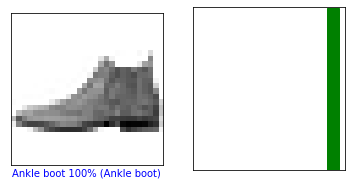

In [29]:
i = 0

plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

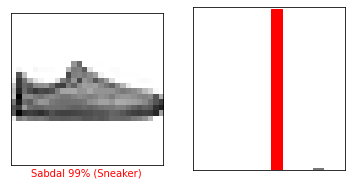

In [30]:
i = 12

plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

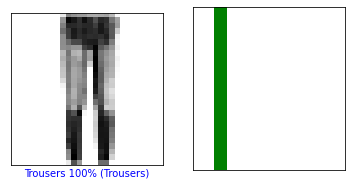

In [31]:
i = 3

plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

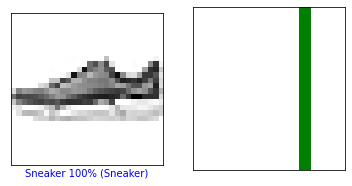

In [32]:
i = 9

plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

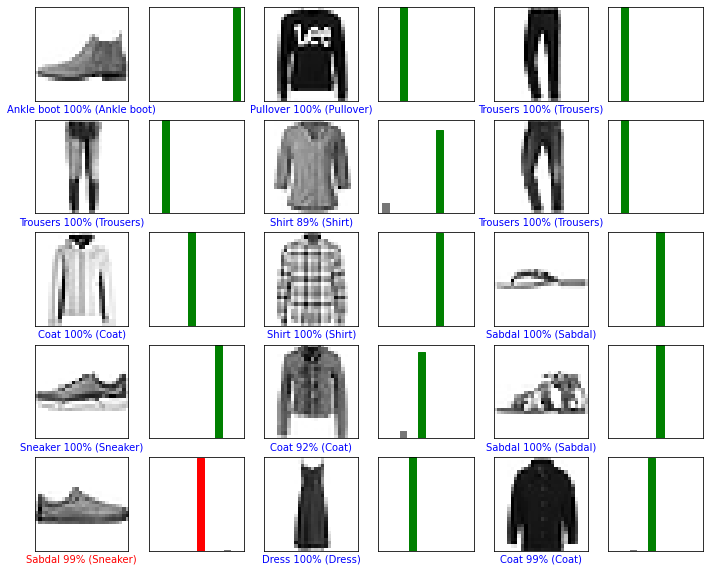

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [34]:
img = test_images
print(img.shape)

(10000, 28, 28)


In [35]:
img = test_images[0]
print(img.shape)

(28, 28)


In [36]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [37]:
prediction_single = model.predict(img)

print(prediction_single)

[[5.3921542e-07 1.8265861e-10 1.1742157e-09 1.1716675e-09 3.6212222e-09
  5.0593917e-05 1.6504366e-08 3.4801953e-03 3.5228538e-09 9.9646866e-01]]
